<a href="https://colab.research.google.com/github/CristhiamGonzalez/IA/blob/main/Proyecto_Final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Predicción de enfermedades cardíacas haciendo uso de la regresión logística***

In [648]:
#Librerias

#Para manipulación y operación de datos
import numpy as np
import pandas as pd

#Para estandarizar
from sklearn.preprocessing import StandardScaler

#Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Para nuestro modelo y su entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Para las métricas de evaluación de clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [649]:
#Importamos el dataset
base_datos = pd.read_csv("heart.csv")
#Visualización del dataset
base_datos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [650]:
#Analizamos la información referente a esta información (tipos de datos, #de columnas y filas..)
base_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [651]:
#Verificamos si faltan datos
base_datos.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [652]:
#Medidas estadísticas referentes a la información
base_datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [653]:
#Verificamos la distribución de las "tarjetas" o variables de salida
base_datos['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [654]:
#Limpiamos nuestro dataset, tomando los valores más relevantes
dataset = base_datos.drop(columns = 'thal', axis = 1)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


**Donde:**

1 <=> Corazón defectuoso


0 <=> Corazón saludable

In [655]:
#Dividimos entre las características y su salida u objetivo
x = dataset.drop(columns='target', axis = 1)
y = dataset['target']

In [656]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [657]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [658]:
#Dividir los datos en: Datos de entrenamiento ( 80% ) y datos de prueba ( 20% )
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size = 0.2,random_state = 42)
print(x.shape, x_entrenamiento.shape, x_prueba.shape)

(303, 12) (242, 12) (61, 12)


In [659]:
#Normalizamos los datos
normalizar = StandardScaler()
x_entrenamiento = normalizar.fit_transform(X_entrenamiento)
x_prueba = normalizar.fit_transform(X_prueba)

In [660]:
#Para el modelo de entrenamiento
#Modelo de clasificación (Regresión logística)
modelo_clasificacion = LogisticRegression()
#Entrenamiento
modelo_clasificacion.fit(x_entrenamiento, y_entrenamiento)

LogisticRegression()

In [661]:
#Predicciones
y_prediccion_entrenamiento = modelo_clasificacion.predict(x_entrenamiento)
y_prediccion_prueba = modelo_clasificacion.predict(x_prueba)

***Para evaluación del modelo***

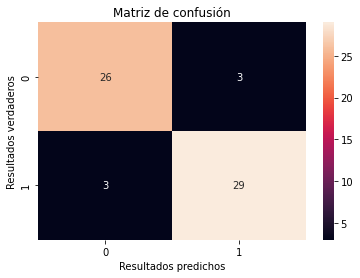

In [662]:
#Métricas a tener en cuenta
#Matriz de confusión
matriz_confusion = confusion_matrix(y_prueba, y_prediccion_prueba)
sns.heatmap(matriz_confusion, annot= True)
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")
plt.show()

In [663]:
#Precisión
precision_datos_prueba = accuracy_score(y_prediccion_prueba, y_prueba)
print('Precisión del modelo: ', precision_datos_prueba)
#F1
f1_datos_prueba_1 = f1_score(y_prueba, y_prediccion_prueba, average = 'macro')
print('Medida F1: ', f1_datos_prueba_1)
#MCC
mcc_datos_prueba = matthews_corrcoef(y_prueba, y_prediccion_prueba)
print('Medida MCC: ', mcc_datos_prueba)

Precisión del modelo:  0.9016393442622951
Medida F1:  0.9014008620689655
Medida MCC:  0.802801724137931


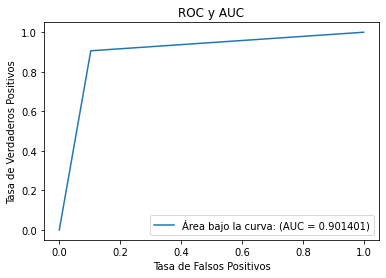

In [664]:
#AUC y ROC
logistic_fpr, logistic_tpr, threshold = roc_curve(y_prueba, y_prediccion_prueba)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.plot(logistic_fpr, logistic_tpr, label ='Área bajo la curva: (AUC = %f)' % auc_logistic)

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')

plt.title("ROC y AUC")
plt.legend()
plt.show()

In [665]:
#Para predecir
#Ejemplo:
ejemplo = [[62,0,0,140,268,0,0,160,0,3.6,0,2]] #Se nos entrega la siguiente información del paciente
#Aplicamos esta entrada al modelo de predicción por regresión lógistica
prediccion = modelo_clasificacion.predict(ejemplo)
#Mostramos el resutado y lo clasificamos
print('El resultado fue: ', prediccion)
if (prediccion == 0):
  print('La persona no presenta disfunciones o defectos en su corazón')
else:
  print('La persona presenta disfunciones o defectos en su corazón')

El resultado fue:  [0]
La persona no presenta disfunciones o defectos en su corazón
